Para un proyecto de ciencia de datos, la nomenclatura (naming convention) no es solo una cuestión de estética; es fundamental para la **reproducibilidad** y para evitar errores comunes, como el *data leakage* (fuga de datos).

Aquí tienes una propuesta de nomenclatura estructurada y profesional que puedes adaptar a tu flujo de trabajo:

---

## 1. Nomenclatura de Archivos (Data Versioning)

Si guardas tus datos en archivos locales o en la nube, utiliza prefijos numéricos para indicar el orden del pipeline:

* `01_raw_data.csv`: Los datos originales, nunca se tocan.
* `02_intermediate_data.csv`: Datos tras una limpieza inicial (tipos de datos, nombres de columnas).
* `03_processed_data.csv`: Datos listos para el análisis exploratorio (EDA).
* `04_feature_engineered.csv`: Datos con nuevas variables y transformaciones finales para el modelo.

---

## 2. Prefijos para Variables y DataFrames

Es muy útil saber en qué estado se encuentra un objeto de Python (o R) con solo leer su nombre.

### Estados del DataFrame

* `df_raw`: El DataFrame cargado directamente de la fuente.
* `df_clean`: Datos sin nulos, duplicados eliminados y nombres de columnas normalizados.
* `df_final` o `df_model`: El set de datos que entra directamente al entrenamiento.

### Variables por Tipo

* `cat_cols`: Lista con nombres de columnas **categóricas**.
* `num_cols`: Lista con nombres de columnas **numéricas**.
* `target_col`: El nombre de la variable objetivo.

---

## 3. Nomenclatura en la Ingeniería de Características

Cuando creas nuevas variables, el nombre debe explicar la transformación aplicada:

| Transformación | Sufijo/Prefijo Sugerido | Ejemplo |
| --- | --- | --- |
| **Logaritmo** | `_log` | `income_log` |
| **Escalado** | `_sc` o `_std` | `age_sc` |
| **Codificación (OHE)** | `_ohe` | `gender_ohe_male` |
| **Binarización** | `is_` | `is_retiring` |
| **Agregación** | `_mean`, `_sum` | `sales_30d_mean` |

---

## 4. Diferenciación de Sets (Evitar Data Leakage)

Para evitar usar datos de prueba durante el entrenamiento, sé muy explícito:

* `X_train`, `y_train`: Datos para entrenar el modelo.
* `X_val`, `y_val`: Datos para ajustar hiperparámetros.
* `X_test`, `y_test`: Datos finales de evaluación (el "examen final").

---

## 5. El Flujo de Transformación

Para mantener el orden visual en tu código, puedes seguir este esquema lógico:

### Reglas de Oro

1. **Snake_case:** En Python, usa siempre minúsculas y guiones bajos (`user_id`, no `UserId`).
2. **Verbos para funciones:** Si creas funciones de preprocesamiento, empieza con un verbo: `clean_text()`, `handle_missing_values()`, `encode_categories()`.
3. **Inmutabilidad (opcional):** Evita sobreescribir el mismo DataFrame constantemente (`df = clean(df)`). Es mejor crear pasos intermedios si la memoria lo permite para poder depurar más fácilmente.

¿Te gustaría que te ayude a crear un **script de ejemplo** aplicando esta nomenclatura para un caso específico (como un dataset de ventas o de clientes)?

In [1]:
import pandas as pd

In [2]:
df_raw = pd.read_csv('./data/train.csv')

df_raw

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,38,Travel_Frequently,693,Research & Development,7,3,Life Sciences,1,1382,4,...,80,3,4,2,3,4,2,0,3,No
1,36,Travel_Rarely,928,Sales,1,2,Life Sciences,1,857,2,...,80,1,18,1,2,18,14,4,11,No
2,42,Travel_Rarely,855,Research & Development,12,3,Medical,1,1768,2,...,80,3,7,6,2,5,3,0,4,No
3,40,Travel_Rarely,1342,Sales,9,2,Medical,1,1548,1,...,80,0,9,5,4,8,4,7,1,No
4,38,Travel_Frequently,240,Research & Development,2,4,Life Sciences,1,803,1,...,80,0,17,2,3,15,7,4,12,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1318,25,Travel_Rarely,240,Sales,5,3,Marketing,1,142,3,...,80,0,6,1,3,6,4,0,3,Yes
1319,38,Travel_Rarely,1009,Sales,2,2,Life Sciences,1,1355,2,...,80,1,11,3,3,7,7,1,7,No
1320,22,Travel_Rarely,217,Research & Development,8,1,Life Sciences,1,1019,2,...,80,1,4,3,2,4,3,1,1,No
1321,36,Travel_Rarely,430,Research & Development,2,4,Other,1,1847,4,...,80,1,15,2,3,1,0,0,0,No


In [3]:
df_raw['JobRole'].value_counts()

JobRole
Sales Executive              301
Research Scientist           257
Laboratory Technician        236
Manufacturing Director       128
Healthcare Representative    118
Manager                       90
Sales Representative          76
Research Director             71
Human Resources               46
Name: count, dtype: int64

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1323 entries, 0 to 1322
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1323 non-null   int64 
 1   BusinessTravel            1323 non-null   object
 2   DailyRate                 1323 non-null   int64 
 3   Department                1323 non-null   object
 4   DistanceFromHome          1323 non-null   int64 
 5   Education                 1323 non-null   int64 
 6   EducationField            1323 non-null   object
 7   EmployeeCount             1323 non-null   int64 
 8   EmployeeNumber            1323 non-null   int64 
 9   EnvironmentSatisfaction   1323 non-null   int64 
 10  Gender                    1323 non-null   object
 11  HourlyRate                1323 non-null   int64 
 12  JobInvolvement            1323 non-null   int64 
 13  JobLevel                  1323 non-null   int64 
 14  JobRole                 

In [5]:
df_raw.nunique()

Age                           43
BusinessTravel                 3
DailyRate                    836
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1323
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1226
MonthlyRate                 1291
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBalance                4
YearsAtCom

## Tratamiento de columnas categoricas
**1 valores:** Eliminar 

**2 valores:** Label Encoding

**3 valores o mas:** One-hot-encoding (Dummies)

In [6]:
df_clean = df_raw.drop_duplicates()

In [7]:
#1 valor
#no compruebo si es INT o OBJECT, las columnas de 1 valor las eliminare directamente
one_value_col = [col for col in df_raw.columns if df_raw[col].nunique() == 1]

#2 valores y tipo object
two_values_col = [col for col in df_raw.columns if df_raw[col].dtype == 'object' and df_raw[col].nunique() == 2]

#3 o mas valores y tipo object
more_two_values_col = [col for col in df_raw.columns if df_raw[col].dtype == 'object' and df_raw[col].nunique() > 2]


In [8]:
#label encoding
map_gender = {'Male':0,'Female':1}
map_yn = {'No':0,'Yes':1}

for col in two_values_col:

		values = set(df_clean[col].unique())

		if values == {'Yes','No'}:
			
			df_clean[col] = df_clean[col].replace(map_yn)
		
		if values =={'Male','Female'}:

			df_clean[col] = df_clean[col].replace(map_gender)


#dummies
df_clean = pd.get_dummies(df_clean, columns=more_two_values_col,drop_first=True)

#convertir las nuevas columnas a int.
bool_cols = df_clean.select_dtypes(include='bool').columns
df_clean[bool_cols] = df_clean[bool_cols].astype(int)

#elimino las columnas de 1 valor
df_clean = df_clean.drop(columns=one_value_col)

#elimino columnas sin valor predictivo
df_clean = df_clean.drop(columns=['DailyRate','MonthlyRate','HourlyRate','EmployeeNumber'])

/tmp/ipykernel_1263/267463073.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_gender)
/tmp/ipykernel_1263/267463073.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_clean[col] = df_clean[col].replace(map_yn)


### comentar esto de la correlacion en el excel --> como no hay ninguna con alta correlacion, no es necesario eliminar ninguna columna

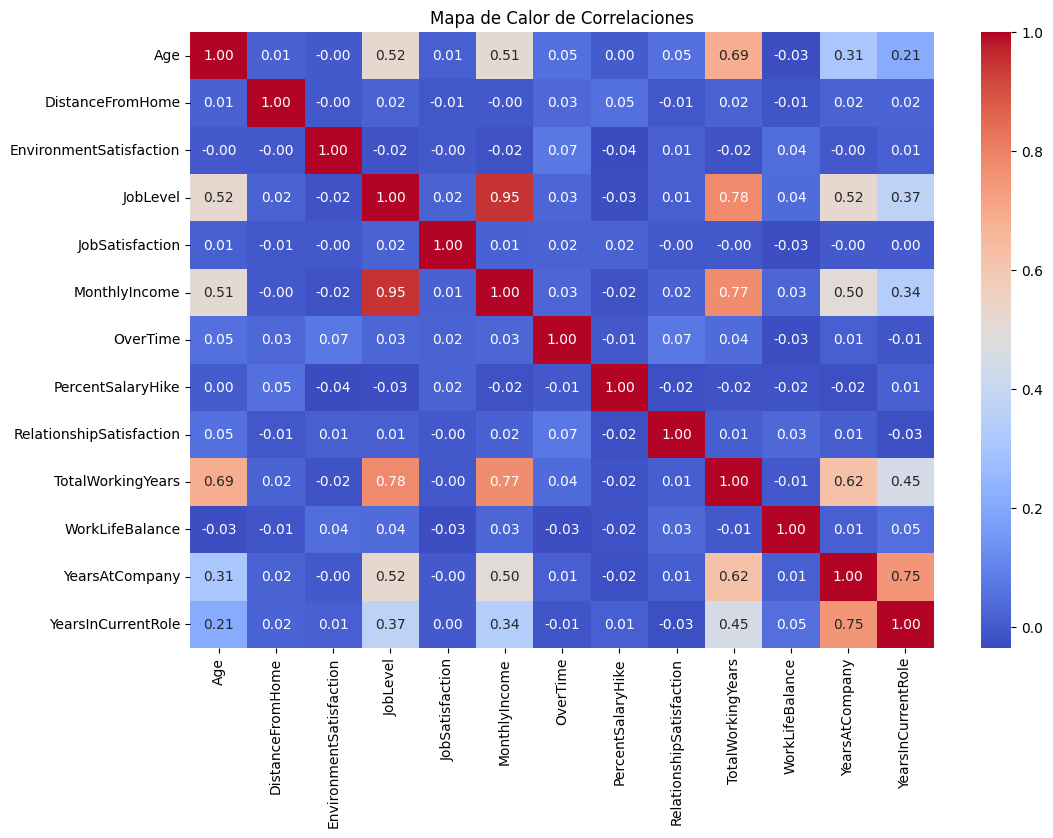

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcula la matriz
variables_corr = ['Age','DistanceFromHome','EnvironmentSatisfaction','JobLevel','JobSatisfaction','MonthlyIncome','OverTime','PercentSalaryHike','RelationshipSatisfaction','TotalWorkingYears','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole']

# Matriz completa de correlación
corr_matrix = df_clean[variables_corr].corr(method='pearson')

# Dibuja el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de Calor de Correlaciones")
plt.show()

### Eliminaciones:
- JobLevel
- YearsInCurrentRole
- TotalWorkingYears
  - Y creo: TotalWorkingYears / CompaniesWorked. Un ratio alto indica estabilidad.

In [ ]:
import numpy as np

df_clean['ratio_years_company'] = df_clean['TotalWorkingYears'] / df_clean['NumCompaniesWorked']
df_clean = df_clean.drop(columns=['JobLevel','YearsInCurrentRole','TotalWorkingYears'])

df_clean['ratio_years_company']
df_clean['ratio_years_company'] = df_clean['ratio_years_company'].replace([np.inf, -np.inf], 0)

df_clean['ratio_years_company']

Para este dataset creo que no es necesario eliminar los outliers, ya que precisamente estos valores son de gran ayuda para que el modelo detecte casos de esas caracterísicas

# RANDOM FOREST
### Aplicaciones:
---
#### 1. GridSearch
#### 2. SMOTE para el desbalanceo